In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df_amostra = pd.read_csv("Amostra.csv")

In [3]:
df_amostra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   LotArea     1460 non-null   int64
 1   MSSubClass  1460 non-null   int64
dtypes: int64(2)
memory usage: 22.9 KB


<AxesSubplot:xlabel='LotArea', ylabel='Count'>

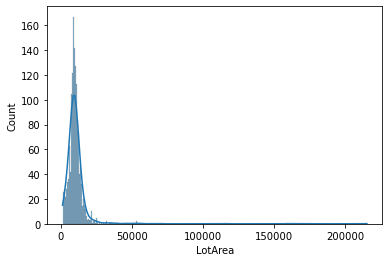

In [7]:
sns.histplot(data=df_amostra, x='LotArea', kde=True)

In [68]:
max_values = df_amostra.max()
max_values

LotArea       215245
MSSubClass       190
dtype: int64

In [67]:
df_amostra.max()


LotArea       215245
MSSubClass       190
dtype: int64

In [13]:
min_values = df_amostra.min()

In [29]:
mean_values = df_amostra.mean()

In [16]:
escala_max_abs = (df_amostra - max_values) / max_values

<AxesSubplot:xlabel='LotArea', ylabel='Count'>

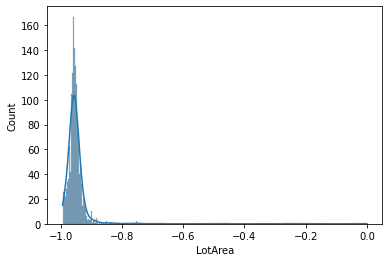

In [18]:
sns.histplot(data=escala_max_abs, x='LotArea', kde=True)


In [19]:
#isso muda a escala, não normaliza
#não queira colocar escala em atributo alvo, isso vai estragar ele

In [20]:
escala_min_max = (df_amostra - min_values)/ (max_values - min_values)

In [21]:
escala_min_max

,LotArea,MSSubClass
0,0.033420,0.235294
1,0.038795,0.000000
2,0.046507,0.235294
3,0.038561,0.294118
4,0.060576,0.235294
...,...,...
1455,0.030929,0.235294
1456,0.055505,0.000000
1457,0.036187,0.294118
1458,0.039342,0.000000


<AxesSubplot:xlabel='LotArea', ylabel='Count'>

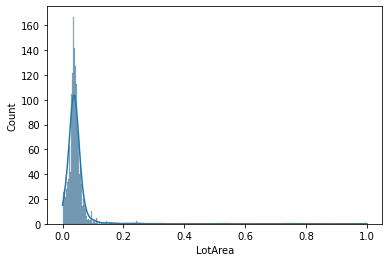

In [22]:
sns.histplot(data=escala_min_max, x='LotArea', kde=True)

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_amostra)
scaled_df = pd.DataFrame(scaled_data, columns=df_amostra.columns )

scaled_df.head()

,LotArea,MSSubClass
0,0.033420,0.235294
1,0.038795,0.000000
2,0.046507,0.235294
3,0.038561,0.294118
4,0.060576,0.235294


In [30]:
normalizacao = (df_amostra - mean_values) / (max_values - min_values)

In [31]:
normalizacao

,LotArea,MSSubClass
0,-0.009661,0.018251
1,-0.004285,-0.217043
2,0.003427,0.018251
3,-0.004519,0.077075
4,0.017496,0.018251
...,...,...
1455,-0.012152,0.018251
1456,0.012425,-0.217043
1457,-0.006893,0.077075
1458,-0.003738,-0.217043


<AxesSubplot:xlabel='LotArea', ylabel='Count'>

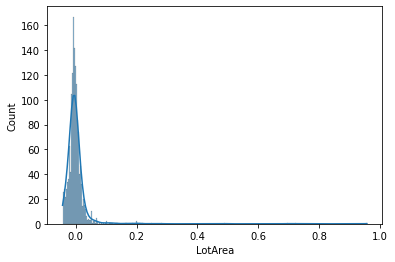

In [32]:
sns.histplot(data=normalizacao, x='LotArea', kde=True)

In [33]:
std_value = df_amostra.std()

In [59]:
padronizacao = (df_amostra - df_amostra.mean())/ (std_value)

<AxesSubplot:xlabel='LotArea', ylabel='Count'>

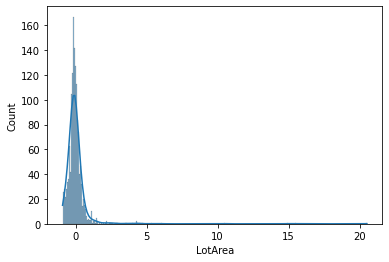

In [36]:
sns.histplot(data=padronizacao, x='LotArea', kde=True)

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_amostra)
scaled_df = pd.DataFrame(scaled_data, columns=df_amostra.columns)

scaled_df.head()

,LotArea,MSSubClass
0,-0.207142,0.073375
1,-0.091886,-0.872563
2,0.073480,0.073375
3,-0.096897,0.309859
4,0.375148,0.073375


In [45]:
robust = (df_amostra - df_amostra.median()) / (df_amostra.quantile(q=.75) - df_amostra.quantile(q=.25))

In [46]:
robust

,LotArea,MSSubClass
0,-0.254076,0.2
1,0.030015,-0.6
2,0.437624,0.2
3,0.017663,0.4
4,1.181201,0.2
...,...,...
1455,-0.385746,0.2
1456,0.913167,-0.6
1457,-0.107831,0.4
1458,0.058918,-0.6


In [47]:
import numpy as np
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler(quantile_range=(25.0, 75.0), with_centering=True)
df_new = scaler.fit_transform(df_amostra)
df_new

array([[-0.25407609,  0.2       ],
       [ 0.03001482, -0.6       ],
       [ 0.43762352,  0.2       ],
       ...,
       [-0.10783103,  0.4       ],
       [ 0.05891798, -0.6       ],
       [ 0.11326581, -0.6       ]])

<AxesSubplot:xlabel='LotArea', ylabel='Count'>

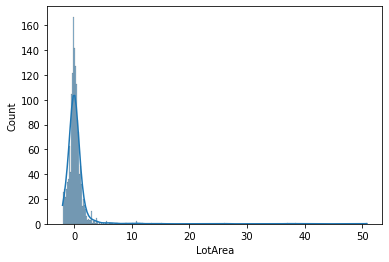

In [53]:
sns.histplot(data=robust, x='LotArea', kde=True)